In [1]:
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier for classification tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # or accuracy_score for classification
import pandas as pd


In [ ]:
# Only for graphing
import IPython.display as display
!pip install pydotplus
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
#import ipython image
from IPython.display import Image
!pip install graphviz

In [2]:
data = {
    "Age": [25, 35, 45, 55, 65],
    "HeartRate": [72, 75, 78, 80, 82]
}
df = pd.DataFrame(data)

X = df[['Age']]
y = df['HeartRate']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The GradientBoostingRegressor is initialized with various parameters, including n_estimators, which defines the number of boosting stages to be run (essentially, the number of trees to be built), learning_rate, which scales the contribution of each tree, and max_depth, which sets the maximum depth of the individual regression estimators. The random_state parameter ensures that the splits that you generate are reproducible.

In [22]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=10, random_state=42)

In [23]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, random_state=42)

In [20]:
y_pred = gb_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8.999043815038581


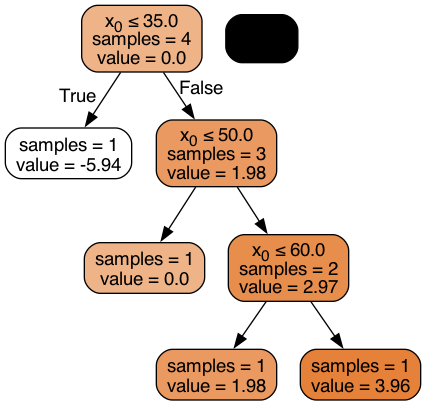

In [16]:



# Get the tree number 42
sub_tree = gb_model.estimators_[1, 0]

dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
Image(png)





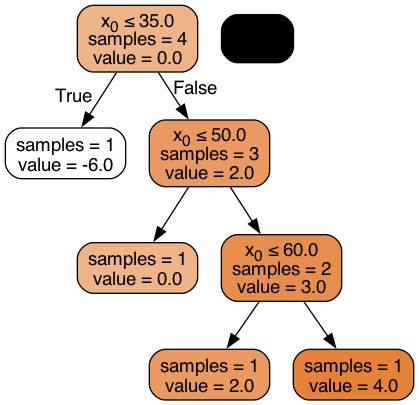

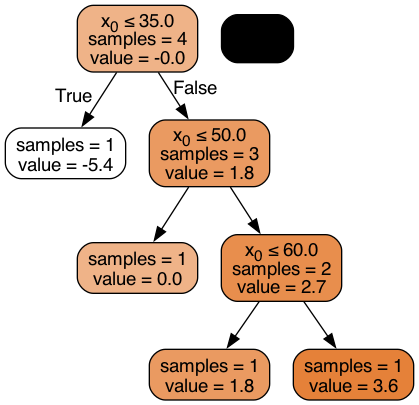

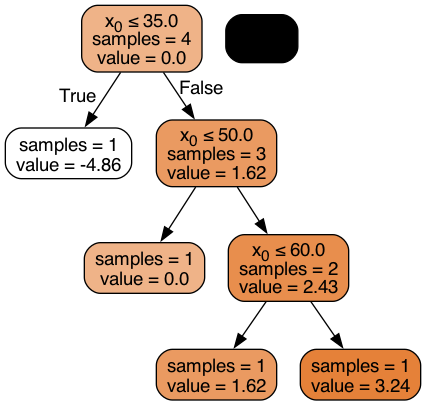

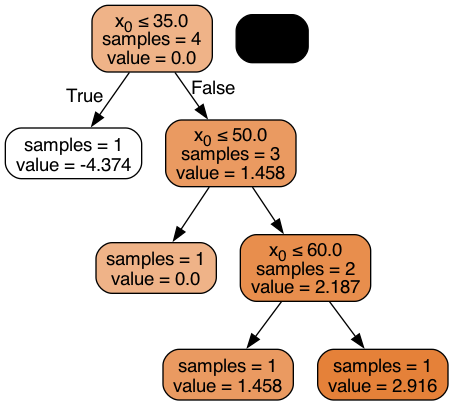

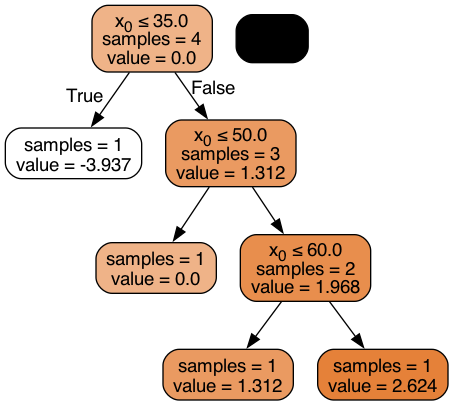

In [21]:
# generate a loop that prints the first 5 trees

for i in range(5):
    sub_tree = gb_model.estimators_[i, 0]

    dot_data = export_graphviz(
        sub_tree,
        out_file=None, filled=True, rounded=True,
        special_characters=True,
        proportion=False, impurity=False, # enable them if you want
    )
    graph = graph_from_dot_data(dot_data)
    png = graph.create_png()
    display.display(Image(png))

In [ ]:
# visualize the first 5 predictions
df_test = pd.DataFrame(X_test)
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
print(df_test.head())


# Predict the heart rate for a 40 year old person
age = 40
heart_rate = gb_model.predict([[age]])
print(f"The predicted heart rate for a {age} year old person is {heart_rate[0]}")

    


   Age  Actual  Predicted
1   35      75  74.196194
The predicted heart rate for a 40 year old person is 78.0


/Users/ericcoopey/repos/dsa411_s25/dsa411/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Let's use the Titanic dataset to do some gradient boosted classification

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

Basic Tree - no hypertuning


In [2]:
titanic_data = pd.read_csv("../data/titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7988826815642458


## Hyperparameter Tuning using Grid Seach CV

First let's use GridSearchCV to obtain the best parameters for the Gradient Boosting model. GridSearchCV is a hyperparameter tuning method in Scikit-learn that exhaustively searches through all possible combinations of parameters provided in the param_grid. For this, we will pass an instance of the GradientBoostingClassifier() to the model and then fit GridSearchCV using the training data to find the best parameters.

In [6]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the results
print("Best Parameters: ", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.8044692737430168


## Hyperparameter Tuning using Randomized Search CV

RandomizedSearchCV performs a random search over a specified parameter grid. Unlike GridSearchCV which tries every possible combination of hyperparameters RandomizedSearchCV randomly selects combinations and evaluates the model often leading to faster results especially when there are many hyperparameters.

In [ ]:

param_dist = {
    'learning_rate': np.arange(0.01, 0.2, 0.01), 
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [3, 5, 7, 9],  
}

gb_model = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")


Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.11}
Best Model Accuracy: 0.8044692737430168
